# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Total points 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
#you may want to import some other modules here such as seaborn or matplotlib

In [100]:
from io import BytesIO
from zipfile import ZipFile
import requests
import re

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [4]:
zipfile.extractall()

In [5]:
! ls ml-latest-small/

README.txt  links.csv   movies.csv  ratings.csv tags.csv


In [6]:
! head  ./ml-latest-small/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [184]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

# Q1 (.25 point) Check if any of the columns are null

In [53]:
# write pandas code here

null_col = movie.isnull().sum()
print('Null columns:')
print(null_col)

Null columns:
movieId    0
title      0
genres     0
dtype: int64


In [185]:
""" there are no nulls in genres because if there is no genre
it will instead say '(no genres listed)', so here I am going to turn those to null and then recount
like above, this will also help with the next question """
movie['genres'] = movie['genres'].replace({'(no genres listed)': None})
null_col = movie.isnull().sum()
print('Null columns:')
print(null_col)

Null columns:
movieId     0
title       0
genres     34
dtype: int64


# Q 2 (.25 point) Check datatype of each of the columns

In [36]:
# write pandas code here
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on series genres, build following  unique_genre set. It should contain all the unique genres from genres column. Print unique genres too.



In [77]:
# write pandas code here
# don't want there to be none listed so have to dropna
unique_genre = set(movie['genres'].str.split('|').dropna().explode().unique())
print('The genres are:')
print(unique_genre)


The genres are:
{'Drama', 'Western', 'Sci-Fi', 'War', 'Documentary', 'Animation', 'Mystery', 'Comedy', 'Thriller', 'Fantasy', 'Crime', 'Action', 'Film-Noir', 'Romance', 'IMAX', 'Horror', 'Adventure', 'Children', 'Musical'}


# Q 4 (1 point) Build columns for different genres with value True or False based on whether a genre is present or not in an observation?



In [186]:
# write pandas code here
# first I want to fill the none columns with nothing
movie['genres'] = movie['genres'].fillna('None')
# now I want to split the categories since right now they are separated by |
movie['genres'] = movie['genres'].apply(lambda genre: genre.split('|'))
# print(movie.head())
genreTF = pd.get_dummies(movie['genres'].apply(pd.Series).stack()).groupby(level=0).any().astype(bool)

movie = pd.concat([movie, genreTF], axis = 1)

In [139]:
print(movie.sample(6))

      movieId                       title              genres  Action  \
3522     4813  When Worlds Collide (1951)            [Sci-Fi]   False   
4792     7139           In America (2002)    [Drama, Romance]   False   
7466    81845   King's Speech, The (2010)             [Drama]   False   
1296     1730               Kundun (1997)             [Drama]   False   
4574     6794      Beethoven's 2nd (1993)  [Children, Comedy]   False   
8976   138204       7 Days in Hell (2015)            [Comedy]   False   

      Adventure  Animation  Children  Comedy  Crime  Documentary  ...  Horror  \
3522      False      False     False   False  False        False  ...   False   
4792      False      False     False   False  False        False  ...   False   
7466      False      False     False   False  False        False  ...   False   
1296      False      False     False   False  False        False  ...   False   
4574      False      False      True    True  False        False  ...   False   
89

# Q5(1 point) Build a "year" column in movie data frame. The title "year" should be embedded in title columns.

Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [187]:
# write pandas code here
movie['year'] = movie['title'].str.extract(r'\((\d{4})\)')

print(movie.sample(6))

      movieId                           title              genres  Action  \
9591   175485               Death Note (2017)  [Horror, Thriller]   False   
1504     2032  Barefoot Executive, The (1971)  [Children, Comedy]   False   
162       191      Scarlet Letter, The (1995)    [Drama, Romance]   False   
9483   169958       Buster's Mal Heart (2017)    [Drama, Mystery]   False   
4673     6981        Ordet (Word, The) (1955)             [Drama]   False   
297       339  While You Were Sleeping (1995)   [Comedy, Romance]   False   

      Adventure  Animation  Children  Comedy  Crime  Documentary  ...   IMAX  \
9591      False      False     False   False  False        False  ...  False   
1504      False      False      True    True  False        False  ...  False   
162       False      False     False   False  False        False  ...  False   
9483      False      False     False   False  False        False  ...  False   
4673      False      False     False   False  False        F

# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

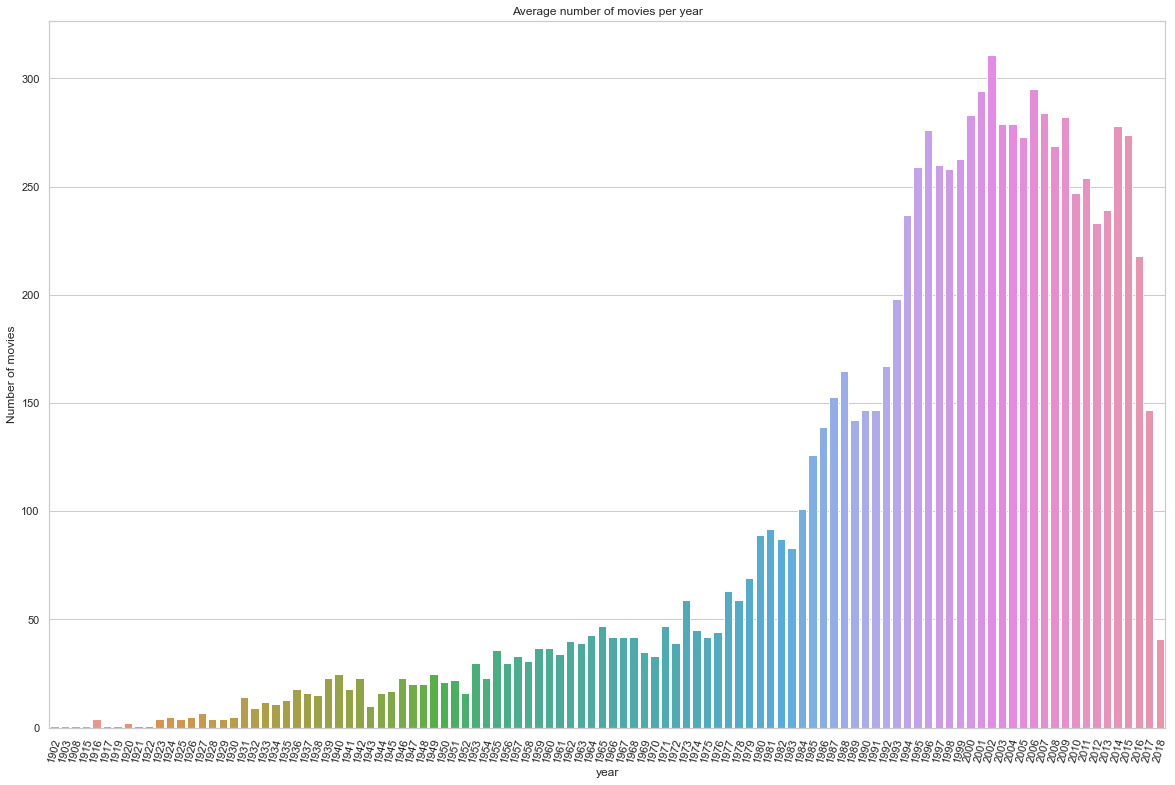

In [188]:
# write code here.
counting = movie.groupby('year')['movieId'].count()

sb.set(style = 'whitegrid')
plt.figure(figsize=(20, 13))
sb.barplot(x = counting.index, y = counting.values)
plt.ylabel('Number of movies')
plt.title('Average number of movies per year')
plt.xticks(rotation=75)
plt.show()

The trend I see here is definitely how many more movies started to be produced every year, and especially shot up starting in the mid 90s, but then starts to drop off after 2014 or so. I feel like there were more movies released in 2018 than the chart displays, so I'm going to assume that the 2018 year was in progress when this data was gathered.

# Q7.(1 point) Using matplotlib, plot total number of movies (cumulative over all the years) for each genre.  Your plot should have proper title, axis labels and legends.

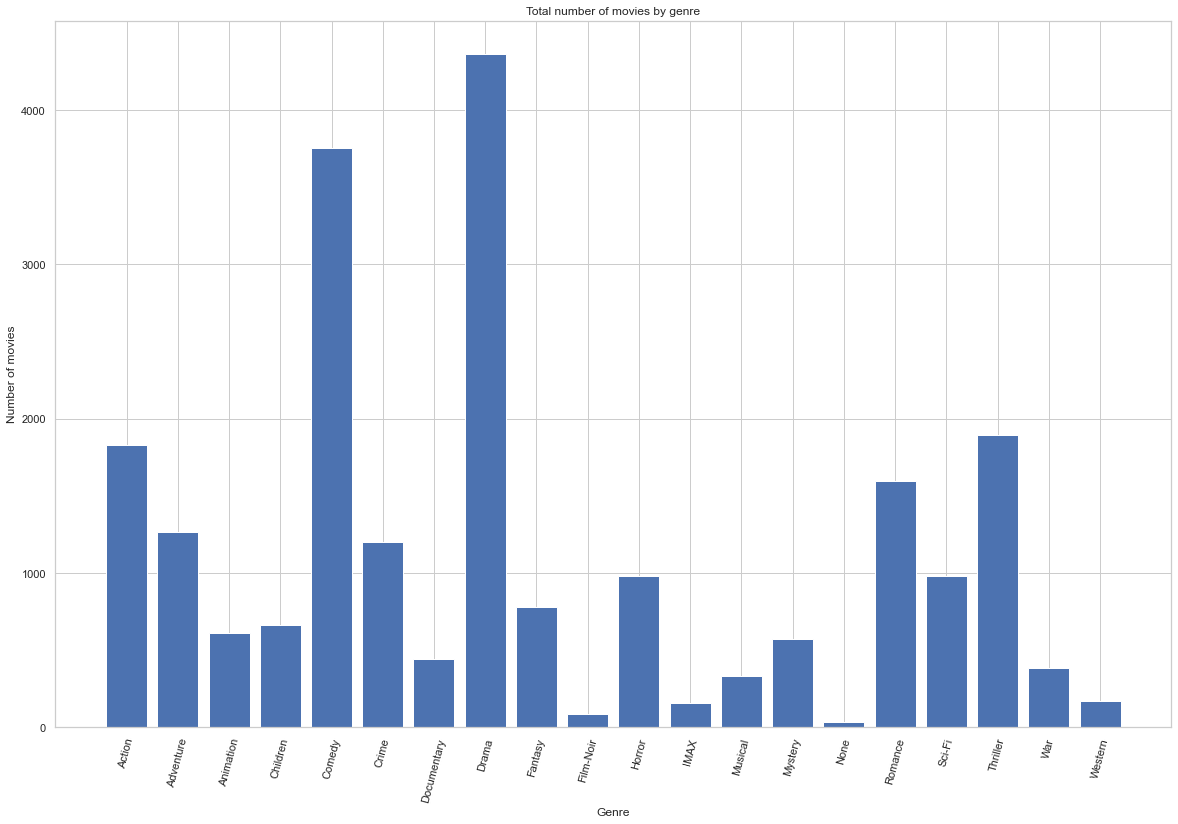

In [189]:
isolate = movie.explode('genres')
# print(isolate)
isolate_count = isolate.groupby('genres')['movieId'].count()

plt.figure(figsize = (20,13))
plt.bar(isolate_count.index, isolate_count.values)
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Total number of movies by genre')
plt.xticks(rotation=75)
plt.show()


# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie. (It should not contain year). Drop the original *title* columns. Display final movie dataFrame.

In [190]:
 # write pandas code here
movie['movie_title'] = movie['title'].str[:-7]
# print(movie.head())
movie.drop(columns = ['title'], inplace = True)
# i'm going to reorder everything
reorder = ['movieId', 'movie_title', 'year','genres', 'Action','Adventure','Animation','Children','Comedy','Crime', 'Documentary', 'Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','None','Romance','Sci-Fi','Thriller','War','Western']
movie = movie.reindex(columns = reorder)
print(movie.sample(6))

      movieId              movie_title  year                        genres  \
4402     6477  Song of Bernadette, The  1943                       [Drama]   
984      1285                 Heathers  1989                      [Comedy]   
6101    42556       7 Faces of Dr. Lao  1964   [Fantasy, Mystery, Western]   
8869   133802                Slow West  2015   [Action, Thriller, Western]   
3399     4624         Meet the Feebles  1989  [Animation, Comedy, Musical]   
4888     7321                  Twisted  2004                    [Thriller]   

      Action  Adventure  Animation  Children  Comedy  Crime  ...  Horror  \
4402   False      False      False     False   False  False  ...   False   
984    False      False      False     False    True  False  ...   False   
6101   False      False      False     False   False  False  ...   False   
8869    True      False      False     False   False  False  ...   False   
3399   False      False       True     False    True  False  ...   False 

# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. You may choose to make separate plots for each genre or to make a single color coded plot as a function of years. All plots should have proper title, axis labels and legends. Write your observation in no more than 2 lines.

In [191]:
# Write your code here.
movie['num_words'] = movie['movie_title'].apply(lambda x: len(x.split()))

movie_exploded = movie.explode('genres')

movie_exploded['num_words'] = movie_exploded['movie_title'].str.split().str.len()

avg_words_by_year_genre = movie_exploded.groupby(['year', 'genres'])['num_words'].mean().reset_index()

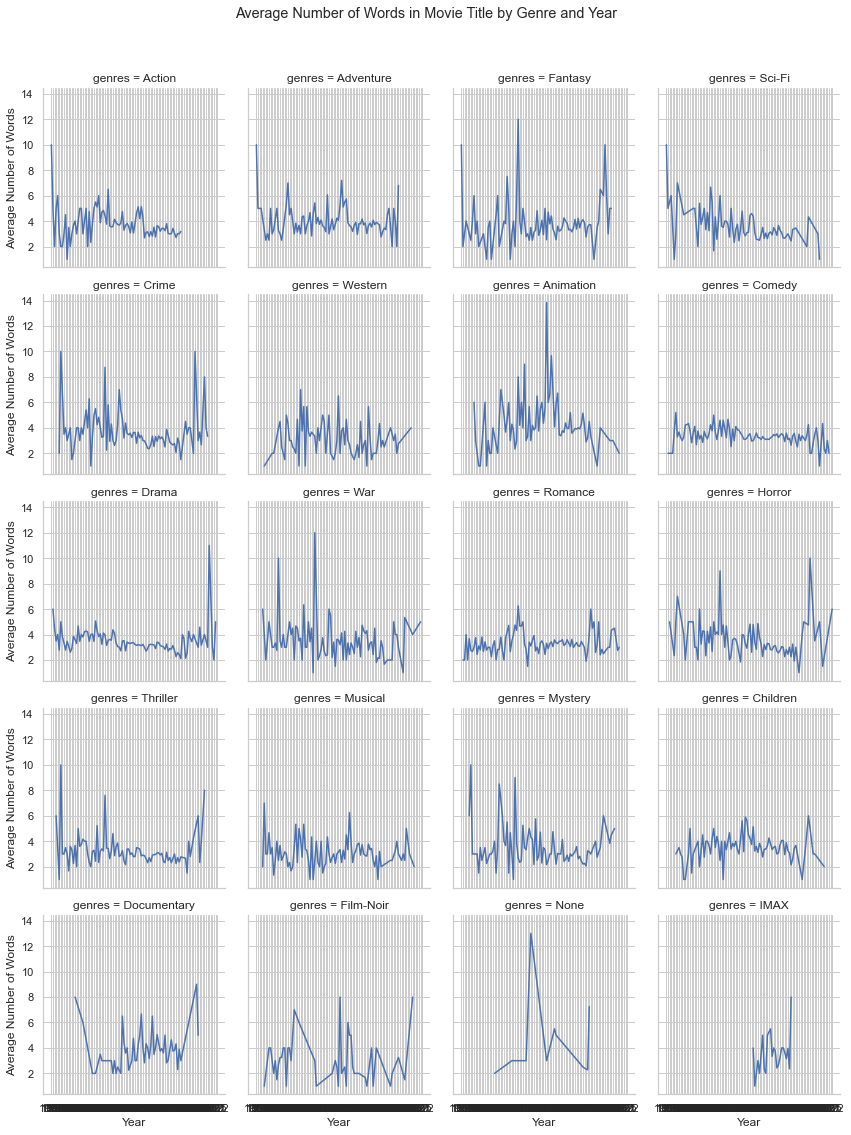

In [204]:
griddy = sb.FacetGrid(avg_words_by_year_genre, col='genres', col_wrap=4, sharex=True, sharey=True)
griddy.map_dataframe(sb.lineplot, 'year', 'num_words')

griddy.fig.suptitle('Average Number of Words in Movie Title by Genre and Year', y=1.05)
griddy.set_axis_labels('Year', 'Average Number of Words')

Observations are that in general it seems as the years progress movie titles in general get shorter (probably for SAO purposes). It also appears that over the years, the romance genre has been the genre with the longest titles